SEARCHING


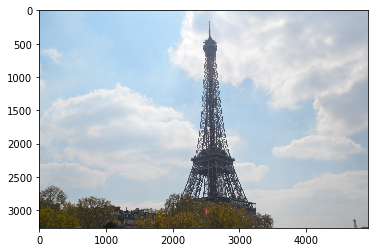

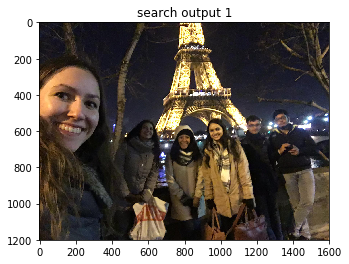

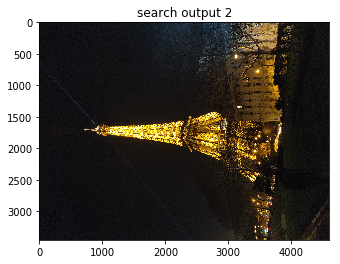

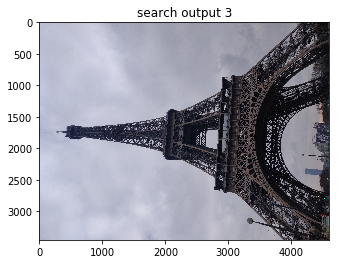

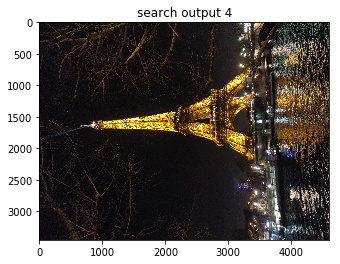

In [2]:
import os
import h5py
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import import_ipynb
from extract_cnn_vgg16_keras import VGGNet

if __name__ == "__main__":
    # read in indexed images' feature vectors and corresponding image names
    os.environ["CUDA_ VISIBLE_DEVICES"] = ""
    
    inp="featureCNN_map.h5"
    hdf = h5py.File(inp,'r')
    
    img_features=hdf['img_features'][:]
    img_names=hdf['img_names'][()]
    
    #print(img_features)
    
    hdf.close()
    
    print("SEARCHING")
    print("=========")
    
    queryPath="query.jpg"
    queryImg = mpimg.imread(queryPath)
    
    plt.imshow(queryImg)
    plt.show()
    
     # init VGGNet16 model
    model = VGGNet()
    
    # extract query image's feature, compute simlarity score and sort
    #print(model.inp_shp)
    queryVector = model.extract_feat(queryPath)
    #print(queryVector.shape)
    #print(img_features.T)
    similarity_scores = np.dot(queryVector, img_features.T)#.T is transpose
    #cos = similarity_scores / (np.sqrt(np.dot(queryVector, queryVector)) * np.sqrt(np.dot(img_features.T, img_features.T)))
    img_rank_ID = np.argsort(similarity_scores)[::-1]
    #img_rank_ID = np.argsort(cos)[::-1]#-1 for decreasing order
    img_rank_score = similarity_scores[img_rank_ID]
    #img_rank_score = cos[img_rank_ID] #Finally getting img_ank_score in descending order
    
    # number of top retrieved images to show
    max_ret = 5
    #print(enumerate(rank_ID[0:maxres]))
    img_list = [img_names[index] for i,index in enumerate(img_rank_ID[0:max_ret])]
    #print("top %d images in order are: " %max_ret, img_list)

    # show top #max_ret retrieved result one by one
    output="database"
    for i,name in enumerate(img_list):
        image = mpimg.imread(output+"/"+str(name, 'utf-8'))
        #image = mpimg.imread(str(name, 'utf-8'))
        plt.title("search output %d" %(i+1))
        plt.imshow(image)
        plt.show()
    
    
    
    